In [1]:
import numpy as np
import os
from azureml.core import Workspace, Experiment
from azureml.core.model import InferenceConfig,Model
from azureml.core.webservice import LocalWebservice,AciWebservice

import azureml

# check core SDK version number
print("Azure ML SDK Version: ", azureml.core.VERSION)

Azure ML SDK Version:  1.0.57


In [2]:

# ENter credentials of workspace

subscription_id = ""
resource_group = ""
workspace_name = ""

ws = Workspace(subscription_id = subscription_id, resource_group = resource_group, workspace_name = workspace_name)
print(ws.name, ws.location, ws.resource_group, ws.location, sep = '\t')

repro	westeurope	adb_rg	westeurope


In [3]:
# Get an experiment object from Azure Machine Learning
experiment = Experiment(workspace=ws, name="custom_vision")

# Create a run object in the experiment
run = experiment.start_logging()

In [5]:

run.upload_folder(path='./model', name="model")

In [6]:
run

Experiment,Id,Type,Status,Details Page,Docs Page
custom_vision,419a0ee4-26c5-47a2-ab7b-5ee3ae34a48e,,Running,Link to Azure Portal,Link to Documentation


In [7]:
model = run.register_model(model_name='model', model_path='model')

In [16]:
from azureml.core.conda_dependencies import CondaDependencies 
from azureml.core.image import ContainerImage

env = CondaDependencies()

env.add_pip_package("numpy")
env.add_pip_package("tensorflow")
env.add_pip_package("pillow")

# Write the environment to disk
with open("env.yml","w") as f:
    f.write(env.serialize_to_string())

In [17]:
inference_config = InferenceConfig(source_directory=os.path.join(os.getcwd(),"score"),
                                   runtime= "python",
                                   entry_script="score.py",
                                   conda_file=os.path.join(os.getcwd(),"env.yml")
                                  )

### Replace LocalWebService with AciWebService to deploy to Azure container instance


https://docs.microsoft.com/en-us/azure/machine-learning/service/how-to-deploy-and-where#deploy-to-target

In [18]:
deployment_config = LocalWebservice.deploy_configuration(port=8877)
service = Model.deploy(ws, "customvisionpro", [model], inference_config, deployment_config)
service.wait_for_deployment(show_output = False)
print(service.state)

Generating Docker build context.
2019/09/11 11:17:02 Downloading source code...
2019/09/11 11:17:04 Finished downloading source code
2019/09/11 11:17:05 Using acb_vol_99d101fc-ec6c-4a0b-8a47-bbfe6db5e64f as the home volume
2019/09/11 11:17:05 Creating Docker network: acb_default_network, driver: 'bridge'
2019/09/11 11:17:05 Successfully set up Docker network: acb_default_network
2019/09/11 11:17:05 Setting up Docker configuration...
2019/09/11 11:17:06 Successfully set up Docker configuration
2019/09/11 11:17:06 Logging in to registry: repro7727500668.azurecr.io
2019/09/11 11:17:17 Successfully logged into repro7727500668.azurecr.io
2019/09/11 11:17:17 Executing step ID: acb_step_0. Timeout(sec): 5400, Working directory: '', Network: 'acb_default_network'
2019/09/11 11:17:17 Scanning for dependencies...
2019/09/11 11:17:18 Successfully scanned dependencies
2019/09/11 11:17:18 Launching container with name: acb_step_0
Sending build context to Docker daemon  59.39kB
Step 1/15 : FROM mcr.

  Created wheel for json-logging-py: filename=json_logging_py-0.2-cp36-none-any.whl size=3924 sha256=6a704a3c87c10a86327dfb3ae592db522c355b81f8bff5c250d0c2bdbb7bc47a
  Stored in directory: /root/.cache/pip/wheels/0d/2e/1c/c638b7589610d8b9358a6e5eb008edacb8b3e9b6d1edc9479f
  Created wheel for absl-py: filename=absl_py-0.8.0-cp36-none-any.whl size=120987 sha256=56a72d7090d4a428ec7cfad409044cc2ff82f54bdd676f104f7458f6130ed142
  Stored in directory: /root/.cache/pip/wheels/9a/1e/7a/456008eb5e47fd5de792c6139df6d5b3d5f71d51c6a0b94799
  Created wheel for wrapt: filename=wrapt-1.11.2-cp36-cp36m-linux_x86_64.whl size=66319 sha256=1a6f00942e2c8e3e5d23ab5455a1c7b001adec384eae89359dbe8655c31eaaa0
  Stored in directory: /root/.cache/pip/wheels/d7/de/2e/efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd
  Created wheel for gast: filename=gast-0.3.1-cp36-none-any.whl size=9289 sha256=956e7274f88d5d3601d6bbea3bfab9d5f4f07fa7095fcc7b37e37fdf8c909485
  Stored in directory: /root/.cache/pip/wheels/d0/e8/

  Created wheel for pycparser: filename=pycparser-2.19-py2.py3-none-any.whl size=111029 sha256=8d40a89f1e083b5a93d840027c676c7d717b16111240e7d9ce0905dcfb3724c6
  Stored in directory: /root/.cache/pip/wheels/f2/9a/90/de94f8556265ddc9d9c8b271b0f63e57b26fb1d67a45564511
Successfully built json-logging-py absl-py wrapt gast termcolor pathspec liac-arff dill pycparser

#
# To activate this environment, use:
# > source activate /azureml-envs/azureml_007b1ffbf70e414fdc48e005caeca009
#
# To deactivate an active environment, use:
# > source deactivate
#

Removing intermediate container 9554bce25fc6
 ---> e4301d98ea24
Step 9/15 : ENV PATH /azureml-envs/azureml_007b1ffbf70e414fdc48e005caeca009/bin:$PATH
 ---> Running in c5c4e56a9899
Removing intermediate container c5c4e56a9899
 ---> db870226f4c7
Step 10/15 : ENV AZUREML_CONDA_ENVIRONMENT_PATH /azureml-envs/azureml_007b1ffbf70e414fdc48e005caeca009
 ---> Running in 011d8326b293
Removing intermediate container 011d8326b293
 ---> 665a932a295d
Step 11/

In [ ]:
service.get_logs()

In [20]:
!wget https://raw.githubusercontent.com/Microsoft/Cognitive-CustomVision-Windows/master/Samples/Images/Test/test_image.jpg

--2019-09-11 11:26:16--  https://raw.githubusercontent.com/Microsoft/Cognitive-CustomVision-Windows/master/Samples/Images/Test/test_image.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.36.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86514 (84K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]  84.49K  --.-KB/s    in 0.01s   

2019-09-11 11:26:17 (7.48 MB/s) - ‘test_image.jpg’ saved [86514/86514]



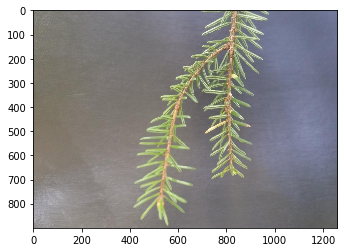

In [26]:
import PIL
from PIL import Image
import numpy as np

import base64
import io
import json
from matplotlib.pyplot import imshow

image = Image.open("test_image.jpg")
imgio = io.BytesIO()
image.save(imgio, "PNG")
imgio.seek(0)


imshow(image)

In [23]:
dataimg = base64.b64encode(imgio.read())
prediction_input = '{"image": "' + dataimg.decode('utf-8') + '"}'
service.run(prediction_input)

Making a scoring call...
Scoring result:
{'id': '', 'project': '', 'iteration': '', 'created': '2019-09-11T11:27:58.001647', 'predictions': [{'tagName': 'Titile_Front_CA', 'probability': 0.00014463000115938485, 'tagId': '', 'boundingBox': None}, {'tagName': 'Title_Front_IN', 'probability': 0.9998553395271301, 'tagId': '', 'boundingBox': None}]}
